## 1. Monte-Carlo

The model is first trained using Monte-Carlo. Output is shown in the table below including
the percentage number of wins from the policy.

In [1]:
import mc
model = mc.monte_carlo(num_episodes=100000)
model.df

,Episode,Relative_Error,Percent_Wins,MSE
0,10000.0,9.144490,46.245375,NaN
1,20000.0,3.128922,48.207590,NaN
2,30000.0,1.876632,49.015033,NaN
3,40000.0,1.336632,49.451264,NaN
4,50000.0,1.108430,49.777004,NaN
5,60000.0,0.777933,49.999167,NaN
6,70000.0,0.745468,50.252139,NaN
7,80000.0,0.682265,50.399370,NaN
8,90000.0,0.528035,50.523883,NaN
9,100000.0,0.526131,50.567494,NaN


The final value function and the optimal policy are shown in the plots below.


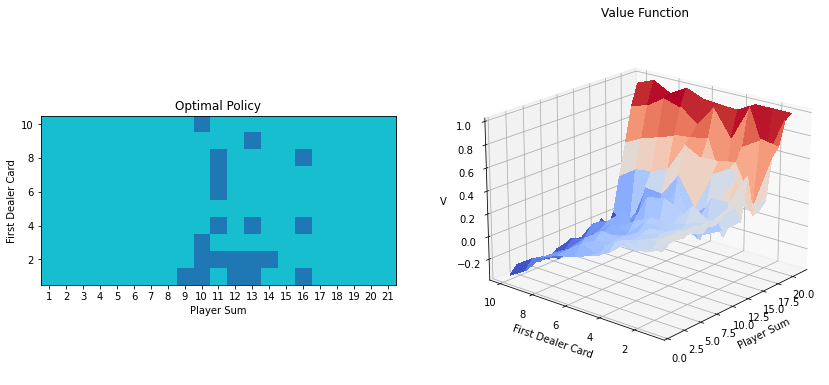

In [2]:
import plots as plt
plt.plot_value_policy(model)

## 2. SARSA($\lambda$)

First we use TD(0) learning to train the model.

In [3]:
import td
model = td.sarsa0(num_episodes=100000)
model.df

,Episode,Relative_Error,Percent_Wins,MSE
0,10000.0,7.920828,47.465253,NaN
1,20000.0,3.014784,48.662567,NaN
2,30000.0,1.421296,49.041699,NaN
3,40000.0,1.072111,49.458764,NaN
4,50000.0,0.779507,49.927001,NaN
5,60000.0,0.673787,50.165831,NaN
6,70000.0,0.556239,50.423565,NaN
7,80000.0,0.508431,50.551868,NaN
8,90000.0,0.507474,50.636104,NaN
9,100000.0,0.447781,50.770492,NaN


The plots show the final value function and policy

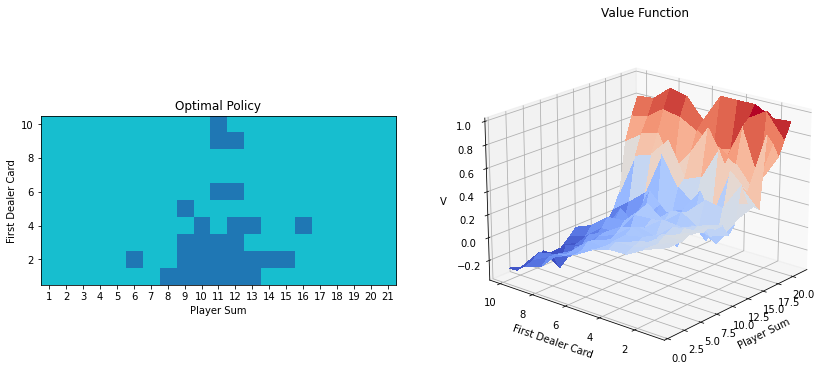

In [4]:
plt.plot_value_policy(model)

## 3. Linear value function approximation

Finally the model is trained using a linear value function approximation and TD learning.
Output from the model training is shown in the table below.

In [5]:
import fa
model = fa.lfa(num_episodes=100000)
model.df

,Episode,Relative_Error,Percent_Wins,MSE
0,10000.0,4.363338,51.444856,NaN
1,20000.0,2.576245,51.347433,NaN
2,30000.0,2.047845,51.674944,NaN
3,40000.0,1.510018,51.488713,NaN
4,50000.0,1.996692,51.468971,NaN
5,60000.0,2.153687,51.424143,NaN
6,70000.0,2.107981,51.462122,NaN
7,80000.0,2.535120,51.448107,NaN
8,90000.0,1.610330,51.397207,NaN
9,100000.0,2.177372,51.410486,NaN


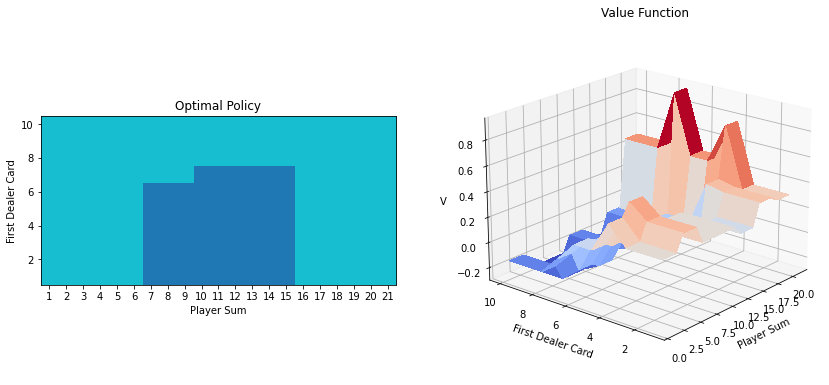

In [6]:
plt.plot_value_policy(model)